Goal:
      The primary goal is to build a regression model that predicts the age of an abalone from its physical measurements. This approach aims to create an efficient alternative to the manual, time-consuming process of counting shell rings to determine age.

Features Description
   These are the input variables your model will use to make predictions:

      Sex: Categorical data indicating the abalone's sex ('M' for Male, 'F' for Female, 'I' for Infant).

      Length: The longest measurement of the shell (in mm).

      Diameter: The measurement perpendicular to the length (in mm).

      Height: The height of the shell with meat inside (in mm).

      Whole weight: The total weight of the abalone (in grams).

      Shucked weight: The weight of the meat (in grams).

      Viscera weight: The gut weight after bleeding (in grams).

      Shell weight: The weight of the empty shell (in grams).

In [1]:
import pandas as pd
df = pd.read_csv("D:/Age_Prediction/data/train.csv")

In [2]:
df.columns

Index(['id', 'Sex', 'Length', 'Diameter', 'Height', 'Whole weight',
       'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings'],
      dtype='object')

In [3]:
df.head()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [4]:
df.tail()

,id,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
90610,90610,M,0.335,0.235,0.075,0.1585,0.0685,0.0370,0.0450,6
90611,90611,M,0.555,0.425,0.150,0.8790,0.3865,0.1815,0.2400,9
90612,90612,I,0.435,0.330,0.095,0.3215,0.1510,0.0785,0.0815,6
90613,90613,I,0.345,0.270,0.075,0.2000,0.0980,0.0490,0.0700,6
90614,90614,I,0.425,0.325,0.100,0.3455,0.1525,0.0785,0.1050,8


In [5]:
df.isnull().sum()

id                0
Sex               0
Length            0
Diameter          0
Height            0
Whole weight      0
Whole weight.1    0
Whole weight.2    0
Shell weight      0
Rings             0
dtype: int64

In [6]:
id=df["id"]
id

0            0
1            1
2            2
3            3
4            4
         ...  
90610    90610
90611    90611
90612    90612
90613    90613
90614    90614
Name: id, Length: 90615, dtype: int64

In [7]:
df.drop(columns=['id'],inplace=True)

In [8]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [9]:
num=[]
cat=[]
for i in df.columns:
    if df[i].dtype=='O':
        cat.append(i)
    else:
        num.append(i)

In [10]:
print("Numerical_columns:",num)
print("Categorical columns:",cat)

Numerical_columns: ['Length', 'Diameter', 'Height', 'Whole weight', 'Whole weight.1', 'Whole weight.2', 'Shell weight', 'Rings']
Categorical columns: ['Sex']


In [11]:
df[num].corr()

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
Length,1.000000,0.989732,0.916094,0.931449,0.909609,0.913134,0.911073,0.623786
Diameter,0.989732,1.000000,0.919618,0.933848,0.908466,0.914668,0.917871,0.636832
Height,0.916094,0.919618,1.000000,0.902344,0.861769,0.886132,0.904019,0.665772
Whole weight,0.931449,0.933848,0.902344,1.000000,0.971249,0.974319,0.964201,0.617274
Whole weight.1,0.909609,0.908466,0.861769,0.971249,1.000000,0.949227,0.911800,0.515067
Whole weight.2,0.913134,0.914668,0.886132,0.974319,0.949227,1.000000,0.937069,0.588954
Shell weight,0.911073,0.917871,0.904019,0.964201,0.911800,0.937069,1.000000,0.694766
Rings,0.623786,0.636832,0.665772,0.617274,0.515067,0.588954,0.694766,1.000000


<Axes: >

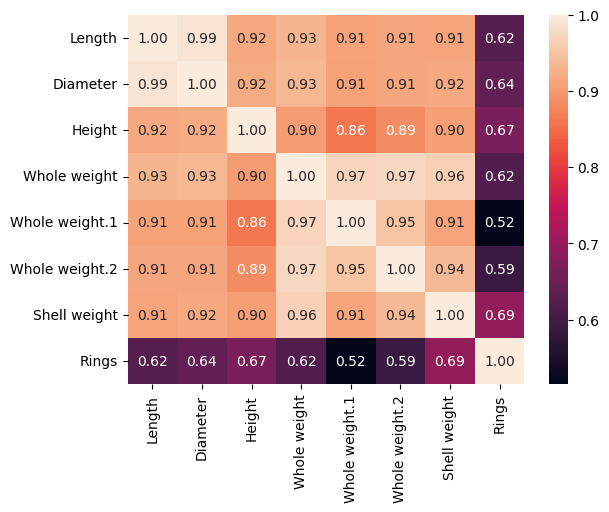

In [12]:
import seaborn as sns
sns.heatmap(df[num].corr(),annot=True,fmt='0.2f')

In [13]:
df["Sex"].value_counts()

Sex
I    33093
M    31027
F    26495
Name: count, dtype: int64

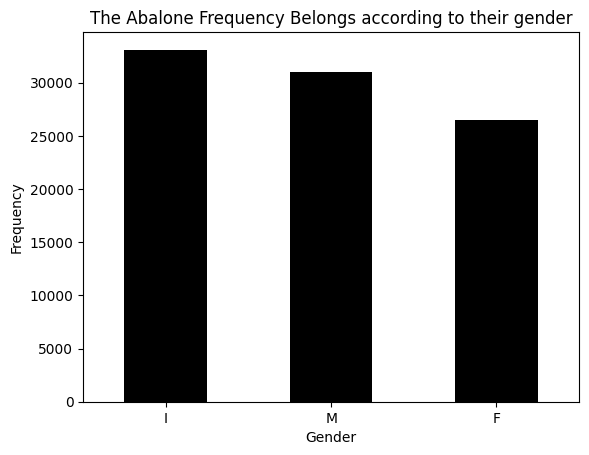

In [14]:
import matplotlib.pyplot as plt
df["Sex"].value_counts().plot(kind='bar',color='black')
plt.title("The Abalone Frequency Belongs according to their gender")
plt.xlabel("Gender")
plt.ylabel("Frequency")
plt.xticks(rotation=0)
plt.show()

In [15]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Rings
0,F,0.550,0.430,0.150,0.7715,0.3285,0.1465,0.2400,11
1,F,0.630,0.490,0.145,1.1300,0.4580,0.2765,0.3200,11
2,I,0.160,0.110,0.025,0.0210,0.0055,0.0030,0.0050,6
3,M,0.595,0.475,0.150,0.9145,0.3755,0.2055,0.2500,10
4,I,0.555,0.425,0.130,0.7820,0.3695,0.1600,0.1975,9


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder,StandardScaler


In [22]:
x_train,x_test,y_train,y_test=train_test_split(df.drop(columns=["Rings"]),df["Rings"],test_size=0.2,random_state=42)

In [29]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)


(72492, 8)
(18123, 8)
(72492,)
(18123,)


In [33]:
one=OneHotEncoder(sparse_output=False)
scaler=StandardScaler()

In [37]:
sex_encoded=one.fit_transform(x_train[["Sex"]])

In [38]:
sex_encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]], shape=(72492, 3))

In [39]:
one.get_feature_names_out()

array(['Sex_F', 'Sex_I', 'Sex_M'], dtype=object)

In [46]:
encoded_df=pd.DataFrame(sex_encoded,columns=one.get_feature_names_out())

In [47]:
encoded_df

,Sex_F,Sex_I,Sex_M
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,1.0,0.0
...,...,...,...
72487,0.0,1.0,0.0
72488,1.0,0.0,0.0
72489,0.0,1.0,0.0
72490,0.0,0.0,1.0


In [41]:
x_train.head()

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
43718,M,0.650,0.505,0.175,1.3850,0.7105,0.3020,0.360
45247,F,0.670,0.520,0.195,1.5405,0.6370,0.3455,0.385
71393,M,0.605,0.495,0.150,1.1345,0.5585,0.2470,0.285
51688,M,0.680,0.560,0.200,1.5340,0.6900,0.3060,0.440
40681,I,0.295,0.200,0.075,0.1075,0.0350,0.0190,0.038


In [43]:
x_train.drop(columns=["Sex"],inplace=True)

In [57]:
print(x_train.shape)
print(encoded_df.shape)

(72492, 7)
(72492, 3)


In [62]:
x_train_reset = x_train.reset_index(drop=True)
encoded_df_reset = encoded_df.reset_index(drop=True)

In [63]:
concatenated_df = pd.concat([x_train_reset, encoded_df_reset], axis=1)

In [64]:
concatenated_df

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
0,0.650,0.505,0.175,1.3850,0.7105,0.3020,0.360,0.0,0.0,1.0
1,0.670,0.520,0.195,1.5405,0.6370,0.3455,0.385,1.0,0.0,0.0
2,0.605,0.495,0.150,1.1345,0.5585,0.2470,0.285,0.0,0.0,1.0
3,0.680,0.560,0.200,1.5340,0.6900,0.3060,0.440,0.0,0.0,1.0
4,0.295,0.200,0.075,0.1075,0.0350,0.0190,0.038,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...
72487,0.350,0.265,0.080,0.1790,0.0630,0.0380,0.055,0.0,1.0,0.0
72488,0.580,0.460,0.140,0.8435,0.3365,0.1665,0.225,1.0,0.0,0.0
72489,0.530,0.420,0.125,0.5965,0.2505,0.1435,0.170,0.0,1.0,0.0
72490,0.695,0.525,0.185,1.8275,0.8850,0.4095,0.499,0.0,0.0,1.0


In [65]:
scaled_train_df=scaler.fit_transform(concatenated_df)

In [66]:
scaled_train_df

array([[ 1.12526481,  1.05513378,  1.03758931, ..., -0.64463575,
        -0.75755815,  1.38768147],
       [ 1.29462748,  1.2083176 ,  1.56286945, ...,  1.55126364,
        -0.75755815, -0.72062647],
       [ 0.7441988 ,  0.95301124,  0.38098914, ..., -0.64463575,
        -0.75755815,  1.38768147],
       ...,
       [ 0.10908878,  0.18709217, -0.27561103, ..., -0.64463575,
         1.32003068, -0.72062647],
       [ 1.50633082,  1.25937887,  1.30022938, ..., -0.64463575,
        -0.75755815,  1.38768147],
       [-1.24581259, -1.2936847 , -1.06353123, ..., -0.64463575,
         1.32003068, -0.72062647]], shape=(72492, 10))

In [67]:
scaled_train_df.shape

(72492, 10)

In [71]:
import pickle
with open('scaler.pkl','wb') as file:
    pickle.dump(scaler,file)

In [72]:
with open('onehot.pkl','wb') as file:
    pickle.dump(one,file)

In [ ]:
import lightgbm as lgb
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


In [76]:
model=lgb.LGBMRegressor(random_state=42)
model.fit(concatenated_df,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000886 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 72492, number of used features: 10
[LightGBM] [Info] Start training from score 9.697111


,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [77]:
model.score(concatenated_df,y_train)

0.6909699572007021

In [ ]:
from random import randint
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint, uniform
param_dist = {
    'n_estimators': randint(100, 1000),
    'learning_rate': uniform(0.01, 0.2),
    'num_leaves': randint(20, 150),
    'max_depth': randint(3, 12),
    'reg_alpha': uniform(0, 1),
    'reg_lambda': uniform(0, 1),
    'colsample_bytree': uniform(0.6, 0.4) # range is [loc, loc + scale]
}

random_search = RandomizedSearchCV(
    estimator=model,
    param_distributions=param_dist,
    n_iter=100,
    cv=5,
    scoring='neg_mean_squared_error',
    n_jobs=-1,
    random_state=42,
    verbose=1
)

random_search.fit(concatenated_df,y_train)

print("\nBest parameters found:", random_search.best_params_)

In [90]:
best_params = {
    'colsample_bytree': 0.668927948480652,
    'learning_rate': 0.04845780376173416,
    'max_depth': 5,
    'n_estimators': 888,
    'num_leaves': 24,
    'reg_alpha': 0.34508262782238674,
    'reg_lambda': 0.3476192144826835
}

final_model=lgb.LGBMRegressor(**best_params,random_state=42)

In [92]:
final_model.fit(concatenated_df,y_train)

[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000873 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1333
[LightGBM] [Info] Number of data points in the train set: 72492, number of used features: 10
[LightGBM] [Info] Start training from score 9.697111
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive 

,boosting_type,'gbdt'
,num_leaves,24
,max_depth,5
,learning_rate,0.04845780376173416
,n_estimators,888
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [95]:
x_test

,Sex,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight
3502,I,0.490,0.380,0.125,0.5290,0.2165,0.1375,0.1550
76031,I,0.420,0.345,0.100,0.3705,0.1625,0.0795,0.1025
49473,M,0.555,0.440,0.135,0.7390,0.3515,0.1575,0.2350
16126,F,0.535,0.410,0.140,0.7090,0.2505,0.1700,0.1900
65405,F,0.605,0.455,0.150,1.0590,0.4275,0.2210,0.3100
...,...,...,...,...,...,...,...,...
71483,M,0.575,0.415,0.125,0.8020,0.3495,0.1655,0.2405
76423,M,0.590,0.435,0.135,0.9745,0.4445,0.2525,0.2715
67841,F,0.450,0.350,0.115,0.4960,0.1905,0.1245,0.1550
36518,M,0.670,0.505,0.175,1.3080,0.5425,0.3230,0.3745


In [93]:
final_model.score(concatenated_df,y_train)

0.7128524498128157

In [ ]:
test_encoded=one.transform(x_test[['Sex']])


In [99]:
test_encoded


array([[0., 1., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       ...,
       [1., 0., 0.],
       [0., 0., 1.],
       [0., 0., 1.]], shape=(18123, 3))

In [102]:
test_encoded_df=pd.DataFrame(test_encoded,columns=one.get_feature_names_out())

In [106]:
test_encoded_df.reset_index(drop=True,inplace=True)

In [108]:
x_test.reset_index(drop=True,inplace=True)

In [109]:
concatenated_df_test=pd.concat([x_test,test_encoded_df],axis=1)

In [110]:
concatenated_df_test

,Length,Diameter,Height,Whole weight,Whole weight.1,Whole weight.2,Shell weight,Sex_F,Sex_I,Sex_M
0,0.490,0.380,0.125,0.5290,0.2165,0.1375,0.1550,0.0,1.0,0.0
1,0.420,0.345,0.100,0.3705,0.1625,0.0795,0.1025,0.0,1.0,0.0
2,0.555,0.440,0.135,0.7390,0.3515,0.1575,0.2350,0.0,0.0,1.0
3,0.535,0.410,0.140,0.7090,0.2505,0.1700,0.1900,1.0,0.0,0.0
4,0.605,0.455,0.150,1.0590,0.4275,0.2210,0.3100,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...
18118,0.575,0.415,0.125,0.8020,0.3495,0.1655,0.2405,0.0,0.0,1.0
18119,0.590,0.435,0.135,0.9745,0.4445,0.2525,0.2715,0.0,0.0,1.0
18120,0.450,0.350,0.115,0.4960,0.1905,0.1245,0.1550,1.0,0.0,0.0
18121,0.670,0.505,0.175,1.3080,0.5425,0.3230,0.3745,0.0,0.0,1.0


In [111]:
scaled_test=scaler.transform(concatenated_df_test)

In [118]:
predictions = final_model.predict(scaled_test)
print("MAE:",mean_absolute_error(y_test,predictions))
print("MSE:",mean_squared_error(y_test,predictions))

MAE: 2.9602581840396396
MSE: 12.840007189091457


d:\Age_Prediction\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [119]:
with open('model.pkl','wb') as file:
    pickle.dump(final_model,file)